# Spatial analysis for $\chi_\rm{h}$

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from tqdm import tqdm
import gc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from util import *

def open_chi(path):  
    ds=(xr.open_dataset(path)*100)
    ds=ds.assign_coords(lon=(((ds.lon + 180) % 360) - 180))
    ds=ds.reindex(lon=sorted(ds.lon))  
    return ds

def workflow(da,chi,lat_min, lat_max, lon_min, lon_max):
    da_mam4 = da[chi]["MAM4"]
    da_ml = da[chi]["ML"]
    da_diff = da[chi]["diff"]
    # show the maps
    plot_difference_with_anchor(da_mam4,da_ml,da_diff,lat_min, lat_max, lon_min, lon_max)
    # show the mean of chi
    print("mam4 mean:",
          np.float(select_data(da_mam4, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("ml mean:",
          np.float(select_data(da_ml, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("diff mean:",
          np.float(select_data(da_diff, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe().mean()))
    print("abs diff mean:",
          np.float(np.abs(select_data(da_diff, lat_min, lat_max, lon_min, lon_max)\
                   .to_dataframe()).mean()))
    # show the mode compositions
    print("Mode Composition:")
    comp = year_comp(chi, lat_min, lat_max, lon_min, lon_max)
    axis = comp.plot(kind="bar", stacked=True)
    fig = axis.get_figure()
    display(comp)

In [2]:
year = "2011"
method_ls = ["MAM4","ML","diff","diff_abs"]
chi_ls = ["chi_h"]

file_path = {}
file_path["MAM4"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_chi/"
file_path["ML"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/ml_chi/"
file_path["diff"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
file_path["diff_abs"] = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mam4_minus_ml_chi/"
mask_path = "/data/keeling/a/zzheng25/d/mam4_paper_data/chi_only/mask/"

name_ls = {}
name_ls["chi_h"]=r'$\chi_{\rm{h}}$ (%)'
name_ls["chi_b"]=r'$\chi_{\rm{b}}$ (%)'
name_ls["chi_c"]=r'$\chi_{\rm{c}}$ (%)'

char_ls="abcdefghijklmno"

## load data

In [3]:
da={}
for chi in tqdm(chi_ls):
    da[chi]={}
    for method in method_ls:
        if method=="diff_abs":
            da_temp = open_chi(file_path[method]+str(year)+"_"+chi+"_mean_abs.nc")[chi]
            mask = open_chi(mask_path+str(year)+"_"+chi+".nc")["mask"]
            da[chi][method] = da_temp.where(mask)
        
        else:
            da_temp = open_chi(file_path[method]+str(year)+"_"+chi+"_mean.nc")[chi]
            mask = open_chi(mask_path+str(year)+"_"+chi+".nc")["mask"]
            da[chi][method] = da_temp.where(mask)
        
        del da_temp, mask
        gc.collect()

100%|██████████| 1/1 [00:01<00:00,  1.80s/it]


## overall

In [4]:
chi = "chi_h"
#############
for method in ["MAM4","ML","diff","diff_abs"]:
    print(method)
    display(da[chi][method].to_dataframe().describe().transpose())

MAM4


,count,mean,std,min,25%,50%,75%,max
chi_h,47720.0,62.79935,28.284623,10.250702,39.396943,70.977655,88.101715,99.848093


ML


,count,mean,std,min,25%,50%,75%,max
chi_h,47720.0,58.096558,11.019038,20.912895,50.066833,57.881466,65.212791,80.560425


diff


,count,mean,std,min,25%,50%,75%,max
chi_h,47720.0,4.702794,35.328766,-63.611889,-31.935025,14.425572,32.759934,76.11474


diff_abs


,count,mean,std,min,25%,50%,75%,max
chi_h,47720.0,38.482661,11.684556,5.994461,31.113113,37.774875,46.923724,76.177119


## Antarctic

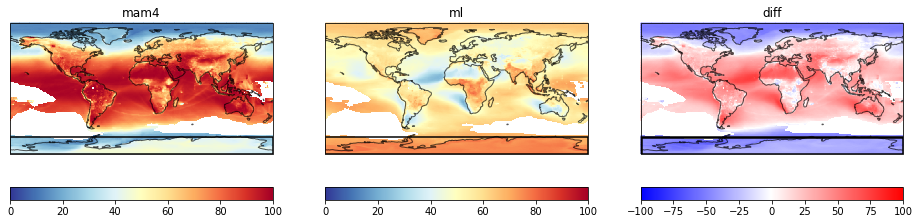

mam4 mean: 37.01768411940935
ml mean: 75.0550308227539
diff mean: -38.03733734016114
abs diff mean: 38.03733734016114
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.001395,0.375050,0.000000,0.047077,15.683071
Accumulation,0.277480,1.643955,27.628505,1.776728,2.016034,42.450717
Primary carbon,1.318616,0.000000,0.000000,6.781372,0.000000,0.000000


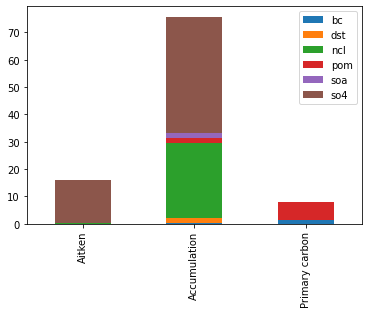

In [5]:
chi = "chi_h"
(lat_min, lat_max, lon_min, lon_max) = (-90,-66.5,-180,180)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Arctic

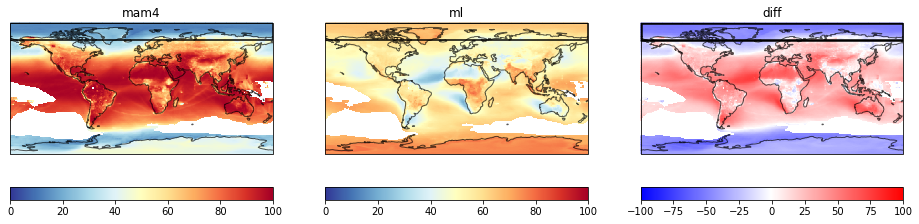

mam4 mean: 21.55635799536523
ml mean: 60.84491729736328
diff mean: -39.288564173246044
abs diff mean: 39.95276642307591
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.000241,0.170095,0.000000,0.076367,0.945398
Accumulation,0.708776,1.337973,13.801279,5.556597,8.038871,25.136350
Primary carbon,5.517944,0.000000,0.000000,38.710110,0.000000,0.000000


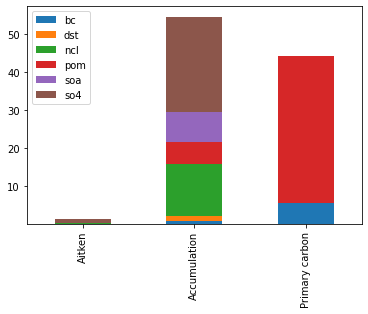

In [6]:
chi = "chi_h"
(lat_min, lat_max, lon_min, lon_max) = (66.5,90,-180,180)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Greenland

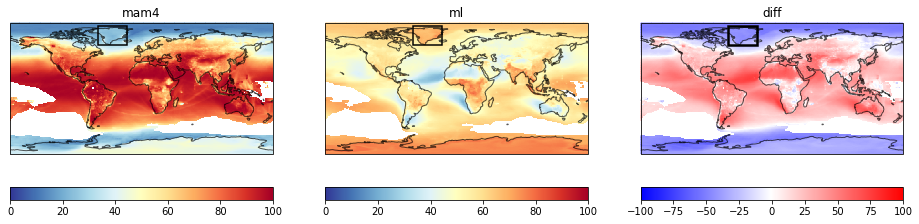

mam4 mean: 25.783019425608973
ml mean: 64.781005859375
diff mean: -38.99798360370449
abs diff mean: 38.99798360370449
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.000324,0.148928,0.000000,0.115110,0.653709
Accumulation,0.732651,1.144486,16.865725,6.569586,5.827707,15.893430
Primary carbon,5.326038,0.000000,0.000000,46.722307,0.000000,0.000000


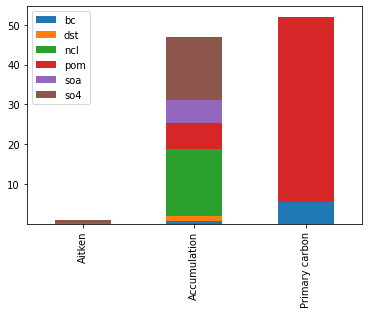

In [7]:
chi = "chi_h"
(lat_min, lat_max, lon_min, lon_max) = (60,85,-60,-20)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## North Atlantic Ocean (near the equator)

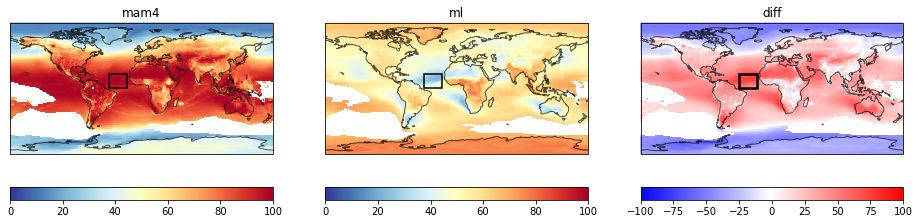

mam4 mean: 96.82444706113091
ml mean: 33.60796356201172
diff mean: 63.2164834670136
abs diff mean: 63.2164834670136
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.013061,0.040921,0.000000,0.000050,0.076441
Accumulation,1.992042,33.524217,28.280448,11.956297,4.474846,17.624222
Primary carbon,0.258161,0.000000,0.000000,1.759294,0.000000,0.000000


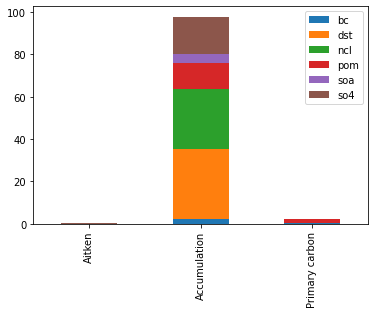

In [8]:
chi = "chi_h"
(lat_min, lat_max, lon_min, lon_max) = (0,20,-45,-20)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## South Africa

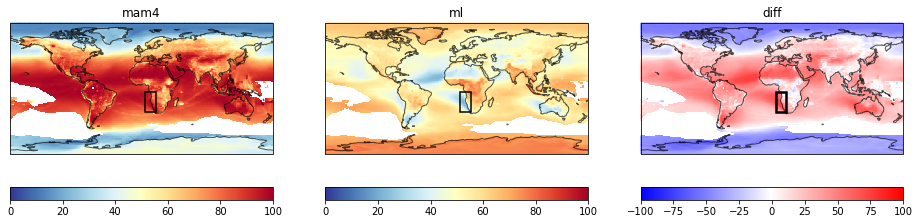

mam4 mean: 88.5783679175425
ml mean: 43.85934829711914
diff mean: 44.71901592402736
abs diff mean: 44.893205938180074
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.019589,0.048836,0.000000,0.006872,0.109985
Accumulation,1.667156,29.120015,21.828960,12.471687,9.927581,14.464511
Primary carbon,1.070687,0.000000,0.000000,9.264120,0.000000,0.000000


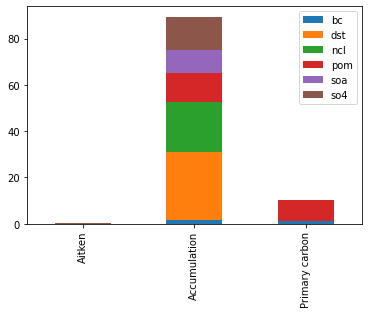

In [9]:
chi = "chi_h"
(lat_min, lat_max, lon_min, lon_max) = (-32,-5,5,20)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)

## Australia

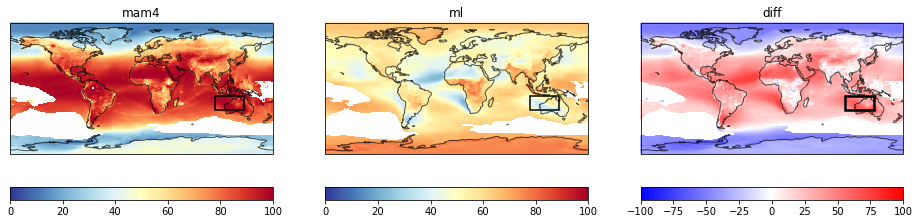

mam4 mean: 93.99141797764682
ml mean: 45.38300323486328
diff mean: 48.60841387763988
abs diff mean: 48.60841387763988
Mode Composition:


,bc,dst,ncl,pom,soa,so4
Aitken,0.000000,0.009830,0.028421,0.000000,0.051905,0.074552
Accumulation,1.024505,28.698921,23.328616,8.817183,26.474831,8.047652
Primary carbon,0.321078,0.000000,0.000000,3.122507,0.000000,0.000000


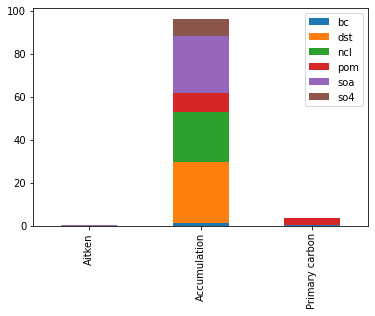

In [10]:
chi = "chi_h"
(lat_min, lat_max, lon_min, lon_max) = (-30,-10,100,140)
workflow(da,chi,lat_min, lat_max, lon_min, lon_max)